In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Introduction: Waves & Harmonics

## Quick History Behind Fourier and Fourier Transforms:

Jean Baptiste Joseph, Baron de Fourier, 1768 - 1830    

- While investigating conductive heat flow in materials, Baron Fourier (title given by Napoleon himself) developed his now famous **Fourier Series** approximately 120 years after Newton published the first book on Calculus. 

- It took him another 20 years to develop the **Fourier Transform** which made the theory applicable to a variety of disciplines such as signal processing where Fourier Analysis is now an essential tool. 

- It seems that Fourier did little to develop the concept further and most of this work was done by Euler, LaGrange, Laplace, and others. Fourier analysis is now also used heavily in communication, thermal analysis, image and signal processing, quantum mechanics, and physics. 


## Superposition in the Time Domain

Fourier noticed that you can create some really interesting looking waves by just summing up simple sine and cosine waves. 


From just this observation, Fourier correctly surmised that all
kinds of interesting and useful waves could probably be created just by combining sines and cosines:


In [ ]:
# Example: Superposition of 3 Sine Waves

# Time variable
t = sp.symbols('t')

# Defining frequencies and amplitudes of 3 distinct waves:
a1, freq1 = [1, 1]
a2, freq2 = [1/5, 9]
a3, freq3 = [1/2, 6]

# Defining 3 sine waves:
sine_1 = a1*sp.sin((freq1*2*np.pi)*t)
sine_2 = a2*sp.sin((freq2*2*np.pi)*t)
sine_3 = a3*sp.sin((freq3*2*np.pi)*t)

# Sum of three sine waves above:
sine_sum = sine_1 + sine_2 + sine_3

print (sine_sum)

sin(6.28318530717959*t) + 0.5*sin(37.6991118430775*t) + 0.2*sin(56.5486677646163*t)


In [ ]:
f_1 = sp.lambdify(t, sine_1)
f_2 = sp.lambdify(t, sine_2)
f_3 = sp.lambdify(t, sine_3)

f_sum = sp.lambdify(t, sine_sum)

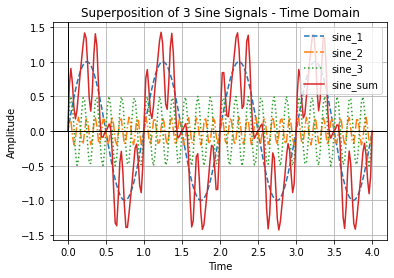

In [ ]:
# Defining time interval
time = np.linspace(0, 4, 200)

# Plotting indivdual sine waves and sum
plt.plot(time, f_1(time), label="sine_1", linestyle="--") 
plt.plot(time, f_2(time), label="sine_2", linestyle="-.") 
plt.plot(time, f_3(time), label="sine_3", linestyle=":") 
plt.plot(time, f_sum(time), label="sine_sum", linestyle="-") 

# Plot formatting
plt.axvline(x=0, linewidth=1, color="k")
plt.axhline(y=0, linewidth=1, color="k")

plt.title("Superposition of 3 Sine Signals - Time Domain")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

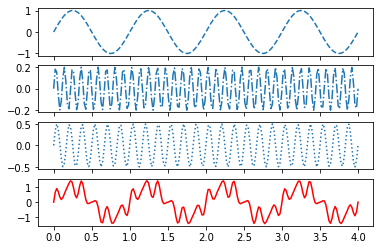

In [ ]:
# Subplots
fig, axs = plt.subplots(4, sharex=True)
fig.suptitle("")
axs[0].plot(time, f_1(time), label="sine_1", linestyle="--")
axs[1].plot(time, f_2(time), label="sine_2", linestyle="-.")
axs[2].plot(time, f_3(time), label="sine_3", linestyle=":")
axs[3].plot(time, f_sum(time), label="sine_sum", linestyle="-", color = "red")
plt.show()

When we look at the signal with time progressing to the right and the amplitude going up and down erratically, we are looking at the signal in what is called the **Time Domain**. This is the summed signal. 

When we look at the same signal from the “side”, along the frequency axis, now what we see are the constituent frequencies along the frequency axis. We also see the peak amplitudes of these discrete frequencies. This view of the signal is called the **Frequency Domain**. Another name for this view is the **Signal Spectrum**.

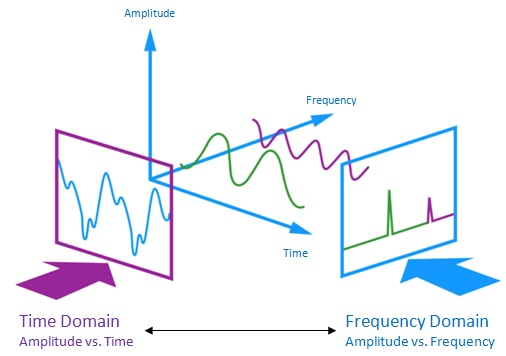

[Image Source Link](https://play.fallows.ca/wp/wp-content/uploads/sites/4/2017/01/Signal-Analysis.jpg)

The concept of spectrum comes about from the realization that any arbitrary wave contains within it many different frequencies. A real signal of any type is an assemblage of all kinds of frequencies.

**Ex: Human Voice**

- Although the range of
frequencies is the same for most humans, the distribution of powers is different and results in a unique and recognizable sound. The spectrum is a way to quantify the power within each of the component frequencies. 


The spectrum of the composite wave above is composed of just three frequencies and can be visualized in the "Frequency Domain" as in the plot below. This view is called a **one-sided spectrum**, not because anything has been left out of it, but that only positive frequencies are represented. 

## Superposition in the Frequency Domain

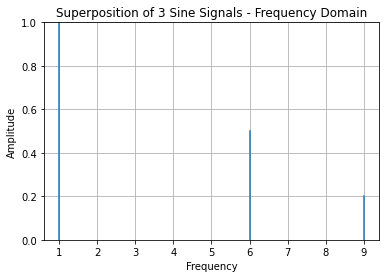

In [ ]:
# Plotting compostion wave in the Frequency Domain
plt.axvline(x=freq1, ymin=0, ymax=a1)
plt.axvline(x=freq2, ymin=0, ymax=a2)
plt.axvline(x=freq3, ymin=0, ymax=a3)

plt.title("Superposition of 3 Sine Signals - Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

- The x-axis in this spectrum represents the frequencies and y-axis is the amplitude or power in those frequencies. 

- Typically a spectrum represents power, so the y-axis value is the peak amplitude squared, hence it is always a positive quantity. 

- Often it is called amplitude, although technically this is not correct. The width of the spectrum is called the **bandwidth** of the signal and the resolution of the frequencies ( $f_{n+1} - f_{n}$ ) is called the **bin size**. 

- The bin size of a spectrum is constant and is an important
parameter in how well the signal has been represented.

- The smallest frequency is called the **Fundamental Frequency**. All other frequencies are integer multiples of this fundamental frequency in the analysis we
are about to undertake.

- A spectrum is a graphical representation of the power content of the fundamental frequency and all its harmonic or integer multiples. This graphical representation is a unique signature of the signal at a
particular time. A spectrum hence is not a static thing and changes as the signal changes.

# Fourier Series and Transforms: An Introduction 


The process of breaking down any arbitrary wave into its harmonic components and identifying their contents, that is their amplitudes, is called **Fourier Analysis**. 

- Fourier analysis says that any arbitrary wave that is periodic can be represented by a sum of sine and cosine waves. 

- Of course, in reality, the component waves
may or may not be harmonic. But thanks to Fourier analysis we can decompose any signal into harmonic components. And that is often good enough to understand the properties of most real signals. 



Any two frequencies, if their ratio is an integer, are harmonic to each other, hence these waves are **harmonics** of each other. We write the sum of $K$ such harmonic sine waves as: 

$$f(t)=\sum_{n=1}^K sin(nwt)\ $$



## Sum of $K$ Harmonic Sine & Cosine Waves

### Using Summation of $K$ Harmonic Sine Waves Function 

Enter Number of Terms: 44
Number of Successive Harmonic Sine Signals: 44
Harmonic Series: 
 sin(6.28318530717959*t) + sin(12.5663706143592*t) + sin(18.8495559215388*t) + sin(25.1327412287183*t) + sin(31.4159265358979*t) + sin(37.6991118430775*t) + sin(43.9822971502571*t) + sin(50.2654824574367*t) + sin(56.5486677646163*t) + sin(62.8318530717959*t) + sin(69.1150383789754*t) + sin(75.398223686155*t) + sin(81.6814089933346*t) + sin(87.9645943005142*t) + sin(94.2477796076938*t) + sin(100.530964914873*t) + sin(106.814150222053*t) + sin(113.097335529233*t) + sin(119.380520836412*t) + sin(125.663706143592*t) + sin(131.946891450771*t) + sin(138.230076757951*t) + sin(144.51326206513*t) + sin(150.79644737231*t) + sin(157.07963267949*t) + sin(163.362817986669*t) + sin(169.646003293849*t) + sin(175.929188601028*t) + sin(182.212373908208*t) + sin(188.495559215388*t) + sin(194.778744522567*t) + sin(201.061929829747*t) + sin(207.345115136926*t) + sin(213.628300444106*t) + sin(219.911485751286*t) + si

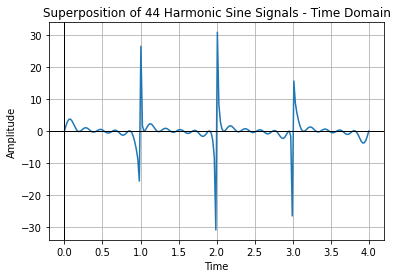

In [ ]:
#Proof of Above Mentioned Statement:

# k: Number of successive harmonic waves
# Insert Value of k:
k = int(input("Enter Number of Terms: "))
print ("Number of Successive Harmonic Sine Signals:", k)


# Defining K Harmonic Sine Sum Function
def harmonic_sine_sum(k):
  sp.symbols('x')
  amp = 1
  freq = 1
  sine_sum = 0 
  for x in range(0, k+1, 1):
    w = 2*np.pi*freq
    new = amp*sp.sin(x*w*t)
    sine_sum += new
  return sine_sum

print ("Harmonic Series:", "\n", harmonic_sine_sum(k), "\n")
f_sine_harmonic = sp.lambdify(t, harmonic_sine_sum(k))

# Defining Plot Function (For Convenience):
def plot_func(x, y):
  plt.plot(x, y)
  plt.axvline(x=0, linewidth=1, color="k")
  plt.axhline(y=0, linewidth=1, color="k")
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.show()

# Plotting:
plt.title("Superposition of %d Harmonic Sine Signals - Time Domain" %k)
plot_func(time, f_sine_harmonic(time))

Sine waves of harmonic frequencies do not have synchronous peaks, so the peak never adds to a linear sum of the amplitudes. This is because all harmonic sine waves cross the x-axis at the same time but never peak at the same time, as opposed to cosine waves which peak at the same time but never cross the x-axis at the same time.


The closed form solution of this summation is given by the following equation:

$$\sum_{n=1}^K sin(nwt)\ = \frac{sin(\frac{1}{2}Nw)sin(\frac{1}{2}(N+1)w)}{sin(\frac{1}{2}Nw)} $$

Similarly, going through the same process, the closed form solution for the summation of $N$ cosine waves is given by: 

$$\sum_{n=1}^K cos(nwt)\ = \frac{cos(\frac{1}{2}Nw)sin(\frac{1}{2}(N+1)w)}{sin(\frac{1}{2}Nw)} $$

- The summation of sines always starts at zero whereas cosines always at one. Both sines and cosines as well as their summations have some special properties. 

- Combinations of arbitrary amplitudes
and phases result in many useful waves. For example, we can create a square wave by the summing odd harmonics of sines. 

## Building the Fourier Series Equation $(Mathematical Approach)$



Now we will put together what we have learned about harmonics for the creation of a general equation
which can be used to represent any arbitrary periodic wave.

Let’s start with the two basic equations that sum harmonic frequencies of sines and cosines of equal amplitudes:

$$f_{1}(t)=\sum_{n=1}^\infty sin(nwt)\ $$

$$f_{2}(t)=\sum_{n=1}^\infty cos(nwt)\ $$


Using $w=2\pi f$, we obtain:

$$f_{1}(t)=\sum_{n=1}^\infty sin(2n\pi ft)\ $$

$$f_{2}(t)=\sum_{n=1}^\infty cos(2n\pi ft)\ $$


Here $f$ is the fundamental frequency. We can also write these equations instead as:

$$ f_{1}(t)=\sum_{n=1}^\infty sin(2\pi f_{n}t)\ $$

$$ f_{2}(t)=\sum_{n=1}^\infty cos(2\pi f_{n}t)\ $$


- Where $f_{n}$ is the $n_{th}$ harmonic of the fundamental. Both of these equations can create a certain class of signals, such as odd or even. We already know what these summations look like. No matter how
many sine waves we add, the starting point will always be zero. 

- If we want to create a wave that does
not start at zero, then we must include cosine waves in the formulation. 

- We also understand that we need to allow the amplitudes to vary if we are to create anything interesting. Summation of equal amplitude sines and cosines are not interesting. By allowing the amplitude to vary, we can create a huge variety of waves, both odd, even, and those with no symmetry. 

Now let’s include both sines and cosines in one equation, allowing their amplitudes to vary by adding a different coefficient for each:

$$ f(t)=\sum_{n=1}^N a_{n} sin(2\pi f_{n}t)\ + \sum_{n=1}^N b_{n} cos(2\pi f_{n}t)\ $$

The coefficients $a_{n}$ represent the coefficient of the $n_{th}$ sine wave and $b_{n}$
 of the $n_{th}$ cosine wave. 

There is one other issue to tackle if we are to make this formula truly general, capable of representing all kinds of waves. The sum of sines and cosines is always symmetrical about the x-axis so there is no
possibility of representing a wave with a DC offset. To do that, we must add a **bias** to the equation above.

The constant, $a_{0}$  we add to the Equation moves the whole wave up (or down) from the x-axis: 

$$ f(t)=a_{0} + \sum_{n=1}^N a_{n} sin(2\pi f_{n}t)\ + \sum_{n=1}^N b_{n} cos(2\pi f_{n}t)\ $$


The coefficient $a_{0}$ provides us with the needed DC offset. Now with this equation we can describe any periodic wave, no matter how complicated looking it is. We know that ultimately we can represent it with just ordinary sines and cosines.

- **Question:** Can we create an exponential and other non-periodic functions with this formulation?

- **Answer:** No. In fact hidden in this formula are exponentials. We can use exponentials to create periodic waves but not the other way around.


**The equation above is called the Fourier Series Equation.** 

**The coefficients $a_{0}, a_{n}, b_{n}$ are called the Fourier Series Coefficients.**


### An Equation with Many Faces

There are several different ways to write the Fourier series equation. One common representation is by
radial frequency. We can replace frequency by $ω$ and then write the equation as:
$$ f(t)=a_{0} + \sum_{n=1}^N a_{n} sin(w_{n}t)\ + \sum_{n=1}^N b_{n} cos(w_{n}t)\ $$

For discrete representation, we define T as the period of the fundamental frequency (the lowest frequency in the set). Then the period of the $n_{th}$ harmonic is $T/n$ and $f_{n}= n/T$. We now write the
Fourier equation as follows: 

$$ f(t)=a_{0} + \sum_{n=1}^\infty a_{n} sin(2\pi \frac{n}{T} t)\ + b_{n} cos(2\pi \frac{n}{T}t)\ $$

The cosine representation, used often in signal processing is written by incorporating a variable for the
phase. Now sine wave is not necessary because by changing the phase we can create any wave.

$$ f(t)=C_{0} + \sum_{n=1}^\infty C_{n} cos(w_{n}t + \phi_{n}) $$

Here is one more way to write the same equation by pulling out the constant amplitude term to the
front:

$$ f(t) = a_{0} + \frac{1}{2\pi} \sum_{n=1}^\infty (a_{n} sin(f_{n}t) + b_{n} cos(f_{n}t)) $$

We can also write the equation starting at zero frequency. Now the bias term is included with the zero
frequency:

$$ f(t) = \frac{1}{2\pi} \sum_{n=1}^\infty (a_{n} sin(f_{n}t) + b_{n} cos(f_{n}t)) $$

Additionally in its most important representation, the complex representation, the Fourier Equation is written as:

$$ f(t) = \sum_{n=-\infty}^\infty (C_{n} e^\frac{jn\pi t}{T}) $$

This says that we can create a periodic function by the summations of exponentials. Complex notation is a most useful albeit a scary looking form. In next part, we will look at how it is derived and used for
signal processing.

**All the different representations of the Fourier Series disscussed above in this section are identical and mean exactly the same thing.**

### Interlude: The Sine Wave as a Summation of Power Functions

We see that a sine wave is the sum of a linear function and then additions and subtractions of restoring forces in the opposite directions. Mathematically, we see this in the following power series equation of a
sine wave:

$$ sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + ...$$

Number of Terms: 8
Order of Series: 8
Power Series: 
 -x**15/1307674368000 + x**13/6227020800 - x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x 

Evaluation of Sine Wave at x=2:  0.9092974268256817 

Evaluation of Series (Order = 1) at x=2:  2
Evaluation of Series (Order = 2) at x=2:  0.6666666666666667
Evaluation of Series (Order = 3) at x=2:  0.9333333333333333
Evaluation of Series (Order = 4) at x=2:  0.907936507936508
Evaluation of Series (Order = 5) at x=2:  0.9093474426807762
Evaluation of Series (Order = 6) at x=2:  0.9092961359628027
Evaluation of Series (Order = 7) at x=2:  0.9092974515196739
Evaluation of Series (Order = 8) at x=2:  0.9092974264614477



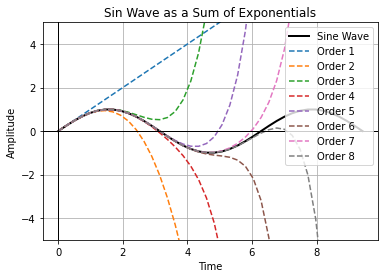

In [ ]:
# Visualizing Sin Wave as a Sum of Exponentials

# Defining Taylor Series Function for sin(x)

# x: variable
x = sp.symbols('x')

# n: number of terms
# Insert Number of Terms to be in Series:
n = int(input("Number of Terms: "))
print ("Order of Series:", n)

def taylor(x, n):
  series = 0
  for i in range(n):
    coef = (-1)**i
    num = x**(2*i + 1)
    denom = math.factorial(2*i + 1)
    series += ( coef ) * ( (num)/(denom) )
  return series

# Print Power Series:
print ("Power Series:", "\n", taylor(x, n), "\n")


# Defining Time Variable:
t = np.linspace(0, 3*np.pi, 40)

# Plotting Sine Wave
plt.plot(t, np.sin(t), color = "k", linewidth = 2, label = "Sine Wave")
print("Evaluation of Sine Wave at x=2: ", np.sin(2), "\n")


# Plotting Terms of Taylor Series Individually 
for i in range(n):
  func_sin = sp.lambdify(x, taylor(x, i+1))
  print("Evaluation of Series (Order = {}) at x=2: ".format(i+1), func_sin(2))
  plt.plot(t, func_sin(t), linestyle="--", label = "Order {}".format(i+1))


# Plot Formatting
print ()
plt.axvline(x=0, linewidth=1, color="k")
plt.axhline(y=0, linewidth=1, color="k")

plt.title("Sin Wave as a Sum of Exponentials")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.ylim(-5, 5)
plt.legend(loc = 'best')
plt.grid()
plt.show()

## Computing the Fourier Coefficients of an Arbitrary Signal


#### Designing an Arbitrary Signal

**For the purposes of visualizing and understanding the process of computing Fourier Coefficients, we introduce here an arbitrary designed periodic signal that we'll be repeatedly referring to throughout the rest of this notebook:**


Random DC Offset: 0.81
Arbitrary Wave: 
 sin(6.28318530717959*t) + 0.2*sin(25.1327412287183*t) + 0.5*cos(1.25663706143592*t) + 0.81 

Period of Signal:  5.0


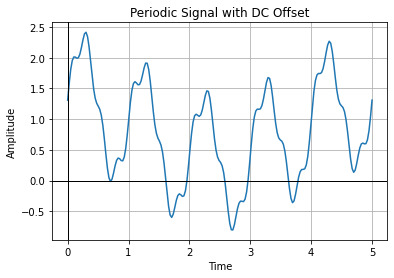

In [ ]:
# Designing a Periodic Signal with a Random Offset/Bias:
# For ease of visualization, we define a wave_sum (a combination of signals of different freqs and amps) and introduce a dc offset (whose value we know but generate randomly). 
# Later, we'll be using concepts discussed in Fourier Series and Transforms to calculate this specific offset, along with other Fourier Coefficients, and build a fourier representation of the function.


#  Define Time Variable (Symbolically)
t = sp.symbols("t")

# Defining Random Composing Amplitudes/Frequencies of the Arbitrary Wave:
a1, freq1 = [1, 1]
a2, freq2 = [1/5, 4]
a3, freq3 = [1/2, 0.2]

# Defining 3 Waves (Symbolically):
sine_1 = a1*sp.sin((freq1*2*np.pi)*t)
sine_2 = a2*sp.sin((freq2*2*np.pi)*t)
cosine_1 = a3*sp.cos((freq3*2*np.pi)*t)

# Sum of Three Waves Above:
wave_sum = sine_1 + sine_2 + cosine_1

# Introducing Random Offset (Between 0.5 and 1):
dc_off = np.random.randint(50, 100)/100
print ("Random DC Offset:", dc_off)

# Update wave_sum:
wave_sum += dc_off

# Display Arbitrary Wave Equation:
print ("Arbitrary Wave:", "\n", wave_sum, "\n")

# SymPy Expression to Lambda Function:
f_wave_sum = sp.lambdify(t, wave_sum)

# One Period:
# The period of wave_sum is computed as the lcm of the individual periods of all component waves:
per1 = int (1/freq1 * 100)
per2 = int (1/freq2 * 100)
per3 = int (1/freq3 * 100)
period = np.lcm.reduce([per1, per2, per3])/100
print("Period of Signal: ", period)

#  Define Time Variable 
time = np.linspace(0, period, 200)

# Plotting:
plt.title("Periodic Signal with DC Offset")
plot_func(time, f_wave_sum(time))

- In signal processing, we are interested in spectral components of a signal. We want to know what the bandwidth is, and how the power is distributed over that bandwidth. When looking at a signal, we have no idea what its components are. So how can we go about assessing the signal? 

- Fourier analysis gives us a tool to do this. But Fourier analysis means breaking a signal down in harmonics. Real life is not made up of neat harmonics. 

- So when we use Fourier analysis, we are deconstructing a signal into harmonic
components which is a sort of an approximation of reality and not its true representation.

We are interested in knowing how many of the sines and cosines the target signal can
be represented by and what their amplitudes are. Alternatively, what we really want are the Fourier
coefficients of the signal. Once we know the Fourier coefficients, we can draw the spectrum.

- **Question:** What is the relationship of Fourier coefficients to the spectrum?
- **Answer:** The coefficients of the sine wave and the coefficients of the cosines, both represent the amplitudes
and hence power of a particular harmonic.

How do we compute the Fourier Coefficients? We will look at each of the three types of coefficients separately and see how they can be computed:

### Computing $a_{0}$ - The $DC$ Coefficient:


$$ f(t) = \color{blue}{a_{0}} + \frac{1}{2\pi} \sum_{n=1}^\infty (a_{n} sin(f_{n}t) + b_{n} cos(f_{n}t)) $$

The constant $a_{0}$ in the Fourier Equation represents the **DC offset**. It can also be called the **bias**. But before we compute it, let’s take a look at a useful property of the sine and cosine waves.

#### Interlude: Symmetry of Sines and Cosines about the x-axis


Both sine and cosine waves are symmetrical about the x-axis. When you integrate a sine or a cosine wave over one period, you will always get zero. The areas above the x-axis cancel out the areas below it. This is always true over one period as we can see:

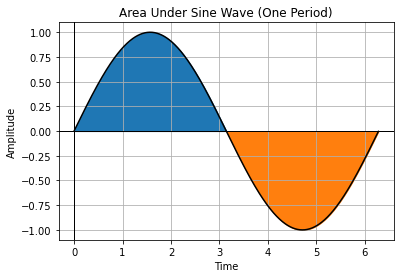

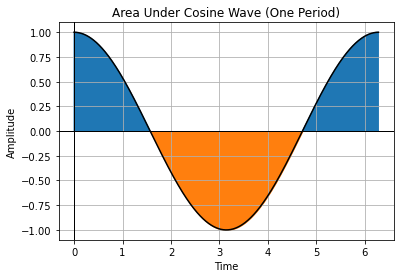

In [ ]:
# Defining variable and functions:
x = np.arange(0, 2*np.pi, 0.01)
sine = np.sin(x)
cosine = np.cos(x)

# Area Fill-in Plot Function (For Convenience): 
def plot_between(x, y):
  plt.plot(x, y, "k")
  plt.fill_between(x, y, where=y>0, color = "#1f77b4")
  plt.fill_between(x, y, where=y<0, color = "#ff7f0e")
  plt.axvline(x=0, linewidth=1, color="k")
  plt.axhline(y=0, linewidth=1, color="k")
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.show()

# Colors Library:
  # Blue: #1f77b4
  # Orange: #ff7f0e
  
  # Olive Green: #bcbd22
  # Cyan: #17becf
# https://matplotlib.org/3.3.1/users/dflt_style_changes.html 

# Sine Plot:
plt.title("Area Under Sine Wave (One Period)")
plot_between(x, sine)

# Cosine Plot:
plt.title("Area Under Cosine Wave (One Period)")
plot_between(x, cosine)

**The area under a sine and a cosine wave over one period is always zero.**

- The same is also true of the sum of sine and cosines. 
- Any wave made by summing sine and cosine waves also has zero area over one period. 
- If we were to integrate the signal represented by the Fourier series over one period as in equation above, **the area obtained will have to come from the DC coefficient $a_{0}$ only.**
- The harmonics make no contribution and they fall out.


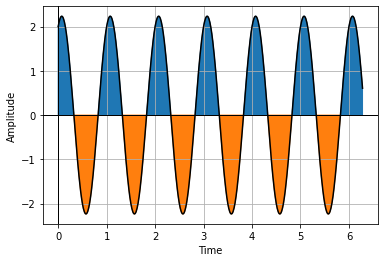

In [ ]:
# Plotting Area Under Sum of Sine and Cosine

# Defining variable and functions:
x = np.arange(0, 2*np.pi, 0.01)

a1, freq1 = [1, 1]
sine = a1*np.sin((freq1*2*np.pi)*x)

a2, freq2 = [2, 1]
cosine = a2*np.cos((freq2*2*np.pi)*x)

# Sum
sum = sine + cosine

# Plotting Area Under Sum of Sine and Cosine:
plot_between(x, sum)

#### Back to Computing $a_{0}$

$$\int_{0}^{T} f(t)dt = \int_{0}^{T} a_{0} dt + \color{red}{\int_{0}^{T} \sum_{n=1}^\infty (a_{n} sin(nwt) + b_{n} cos(nwt)) dt}$$



The second term (indicated in red) is zero, since it is just the integral of a wave made up of sine and cosines.

Now we can compute $a_{0}$ by taking the integral of the arbitrary wave over one period:

- We notice that, for an individual period, removing the DC offset resulted in equalizing the area between the regions above and below the x-axis. 

The area under one period of a wave is equal to:

$$\int_{0}^{T} f(t)dt = \int_{0}^{T} a_{0} dt$$




Integrating this very simple equation we get: 
$$\int_{0}^{T} f(t)dt =  a_{0} T$$

We can now write a very easy equation for computing $a_{0}$:
$$ a_{0} = \frac{1}{T} \int_{0}^{T} f(t)dt $$



Since no harmonics contribute to the area, we see that $a_{0}$  is equal to simply the area under the wave for one period. We can compute this area in software and if it comes out zero, then there is no DC Offset.

Integrating the Arbitrary Wave Over One Period:


a0 =  0.810000000000000 



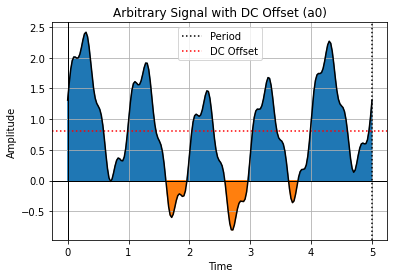

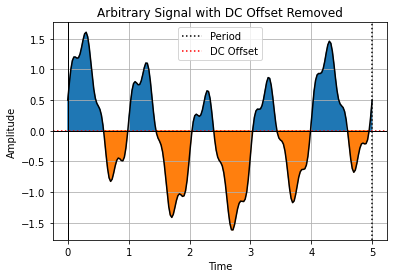

In [ ]:
# Integrating the Arbitrary Wave Over One Period (DC Bias Calculation):
int_wave = sp.integrate(wave_sum, t) 
area = int_wave.subs(t, period) - int_wave.subs(t, 0)
a0 = area/period
print("a0 = ", a0, "\n")

# Plotting the Arbitrary Signal with the DC Offset (a0):
plt.axvline(x=period, linestyle=":", linewidth=1.5, color="k", label="Period")
plt.axhline(y=a0, xmin=0, xmax=period, linestyle=":", color="r", label="DC Offset")
plt.title("Arbitrary Signal with DC Offset (a0)")
plt.legend()
plot_between(time, f_wave_sum(time))


# Removing DC Offset from Signal:
new_wave_sum = wave_sum - a0
f_new_wave_sum = sp.lambdify(t, new_wave_sum) 

# Plotting the Arbitrary Signal without the DC Offset (a0):
plt.axvline(x=period, linestyle=":", linewidth=1.5, color="k", label="Period")
plt.axhline(y=a0-a0, xmin=0, xmax=period, linestyle=":", color="r", label="DC Offset")
plt.title("Arbitrary Signal with DC Offset Removed")
plt.legend()
plot_between(time, f_new_wave_sum(time))


### Computing $a_{n}$ - The Coefficients of Sine Waves


$$ f(t) = a_{0} + \frac{1}{2\pi} \sum_{n=1}^\infty (\color{blue}{a_{n}} sin(f_{n}t) + b_{n} cos(f_{n}t)) $$

Now we employ a slightly different trick from basic trigonometry to compute the coefficients of the various sine waves. Below we show a sine wave that has been multiplied by itself.

$$ f(t) = sin(nwt) \times sin(nwt) $$

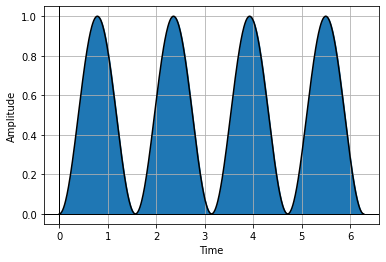

In [ ]:
# The area under a sine wave multiplied by itself is always non-zero.

# Defining x
x = np.arange(0, 2*np.pi, 0.01)

# Defining Sine Wave:
sine1 = np.sin(2*x)

mul = sine1*sine1
plot_between(x, mul)

- **The area under a sine wave multiplied by itself is always non-zero.**

We notice that the wave now lies entirely above the x-axis and has net positive area. From integral
tables we can compute this area as equal to: 

$$ \int_{0}^{T} a_{n}sin(nwt) sin(nwt) dt  = a_{n}T/2  $$ 
for $n=m$


Now multiply the sine wave by an arbitrary harmonic of itself to see what happens to the area.

$$ f(t) = sin(wt) \times sin(nwt) $$

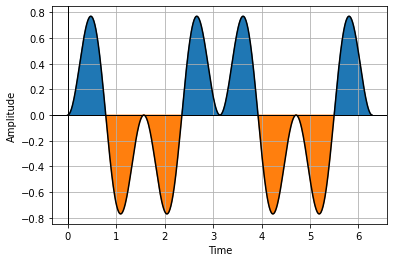

In [ ]:
# The area under a sine wave multiplied by its own harmonic is always zero:

# Defining 'x'
x = np.arange(0, 2*np.pi, 0.01)

# Defining Harmonic Sine Waves:
sine1 = np.sin(2*x)
sine2 = np.sin(4*x)

mul = sine1*sine2
plot_between(x, mul)

- **The area under a sine wave multiplied by its own harmonic is always zero.**


The area in one period of a sine wave multiplied by its own harmonic comes out to be zero. We
conclude that when we multiply our signal by a particular harmonic, then integrate the product over one period, the only contribution comes only from that particular harmonic. All other harmonics contribute nothing and fall out. Writing this in integral form, 

$$ \int_{0}^{T} a_{n}sin(nwt) sin(mwt) dt  = 0 \: \: \: for \: n \neq m$$


$$ \int_{0}^{T} a_{n}sin(nwt) sin(nwt) dt  = a_{n}T/2  \: \: \: for \: n = m$$


Multiply the signal by a certain harmonic, integrate and the result is equal to scaled coefficient of that harmonic. We can do that $n$ times, incrementing the harmonic frequency, multiplying it by the signal, then integrating to get the amplitude of that harmonic hidden in the signal. This is essentially what an inverse Fourier transform does. But the signal also has cosines in it too. 

Now let’s multiply a sine wave by a cosine wave to see what happens:


$$ \int_{0}^{T} a_{n}cos(nwt) sin(mwt) dt  = 0 $$



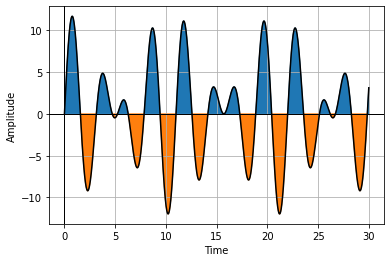

In [ ]:
# The area under a cosine wave multiplied by a sine wave is always zero.

# Defining 'x'
x = np.arange(0, 30, 0.01)

# Defining Harmonic Sine Waves:
sine1 = 3*np.sin(2*x)
cosine1 = 4*np.cos(0.3*x)

mul = sine1*cosine1
plot_between(x, mul)

- **The area under a cosine wave multiplied by a sine wave is always zero.**

Summarizing:

$$ \int_{0}^{T} a_{n}sin(nwt) sin(mwt) dt  = 0 \: \: \: for \: n \neq m$$


$$ \int_{0}^{T} a_{n}sin(nwt) sin(nwt) dt  = a_{n}T/2  \: \: \: for \: n = m$$

$$ \int_{0}^{T} a_{n}cos(nwt) sin(mwt) dt  = 0 $$





- Remember in vector representation, sines and cosines are orthogonal to each other. This result tells us something about the orthogonality of sines and cosines. We are basically taking a dot product here.

- The dot product of a sine and cosine results in no area, hence the two signals are orthogonal. 

- In fact, all harmonics are orthogonal to each other. The dot product of two orthogonal waves is always zero which corroborates the above results. 

- Another very satisfying interpretation is that sine wave and cosine waves act as filtering signals. In essence they act as a narrow-band filter and ignore all frequencies except the one of interest. This is the fundamental concept of a filter.

Now let’s use this information. Successively multiply the Fourier equation by a sine wave of a particular harmonic and integrate over one period as in equation below:

$$ \int_{0}^{T} f(t)sin(nwt) dt  = \color{red}{\int_{0}^{T} a_{0}sin(wt) dt} + \int_{0}^{T} a_{n}sin(nwt) sin(nwt) dt + \color{red}{\int_{0}^{T} b_{n}cos(nwt) sin(nwt) dt} $$


We know that the integral of the first and the third term is zero since the first term is just the integral of a sine wave multiplied by a constant and the third is of a sine wave multiplied by a cosine wave. This simplifies our equation considerably. We know that integral of the second term is:

$$ \int_{0}^{T} a_{n}sin(nwt) sin(nwt) dt  = \frac{a_{n}T}{2}  $$

From this we write the equation to obtain $a_{n}$ as follows:

$$ a_{n} = \frac{2}{T} \int_{0}^{T} f(t)sin(nwt) dt  $$

Equivalently, taking $L$ as one half the period of a wave, and substituting in angular frequency, we get:
$$ a_{n} = \frac{1}{L} \int_{-L}^{L} f(t)sin(\frac{n\pi t}{L}) dt$$

- The coefficient $a_{n}$ is hence computed by taking the target signal over one period, successively multiplying it with a sine wave of $nth$ harmonic frequency and then integrating. 

- This gives the coefficient
for that particular harmonic. If we do this $n$ times, we will get $n$ coefficients.

In [ ]:
# Computing "a_n": The Coefficients of Sine Waves 
print("Wave Sum Function:", "\n", wave_sum)
print("Period =", period, "\n")
L = period/2
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a_n = []
for n in x:
  int_wave = sp.integrate(wave_sum * sp.sin(n*np.pi*t/L), t)
  area = int_wave.subs(t, L) - int_wave.subs(t, -L)
  a_coeff = area/L
  a_n.append(a_coeff)
print("a_n = ", a_n, "\n")

Wave Sum Function: 
 sin(6.28318530717959*t) + 0.2*sin(25.1327412287183*t) + 0.5*cos(1.25663706143592*t) + 0.81
Period = 5.0 

a_n =  [0, 0, 0, 5.55111512312578e-18, 1.00000000000000, 3.33066907387547e-17, 0, -2.77555756156289e-18, 0, 2.77555756156289e-18] 



### Computing $b_{n}$ - The Coefficients of Cosine Waves


$$ f(t) = a_{0} + \frac{1}{2\pi} \sum_{n=1}^\infty (a_{n} sin(f_{n}t) + \color{blue}{b_{n}} cos(f_{n}t)) $$

Now instead of multiplying by a sine wave we multiply by a cosine wave. The process is exactly the same as above:

$$ \int_{0}^{T} f(t)cos(nwt) dt  = \color{red}{\int_{0}^{T} a_{0}cos(wt) dt} + \color{red}{\int_{0}^{T} a_{n}sin(nwt) cos(nwt) dt} + \int_{0}^{T} b_{n}cos(nwt) cos(nwt) dt $$


Now terms 1 and 2 become zero. The third terms as above is equal to:

$$ \int_{0}^{T} b_{n}cos(nwt) cos(nwt) dt  = \frac{b_{n}T}{2}  $$

and the equation can be written as:

$$ b_{n} = \frac{2}{T} \int_{0}^{T} f(t)cos(nwt) dt  $$
$$ b_{n} = \frac{1}{L} \int_{-L}^{L} f(t)cos(\frac{n\pi t}{L}) dt  $$

In [ ]:
# Computing "b_n": The Coefficients of Cosine Waves 
print("Wave Sum Function:", "\n", wave_sum)
print("Period =", period, "\n")
L = period/2
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_n = []
for n in x:
  int_wave = sp.integrate(wave_sum * sp.cos(n*np.pi*t/L), t)
  area = int_wave.subs(t, L) - int_wave.subs(t, -L)
  b_coeff = area/L
  b_n.append(b_coeff)
print("b_n = ", b_n, "\n")

Wave Sum Function: 
 sin(6.28318530717959*t) + 0.2*sin(25.1327412287183*t) + 0.5*cos(1.25663706143592*t) + 0.81
Period = 5.0 

b_n =  [0.500000000000000, -3.33066907387547e-17, 2.22044604925031e-17, -2.22044604925031e-17, 1.24900090270330e-16, 0, 2.22044604925031e-17, -2.22044604925031e-17, 2.22044604925031e-17, -2.22044604925031e-17] 



### Summary

- So the process of finding the coefficients is multiplying the target signal with successively larger harmonic frequencies of a sine wave and integrating the results. This is easy to do in software. 

- The result obtained is the coefficient for that particular frequency of sine wave. We do the same thing for cosine
coefficients.

- Conceptually, the process of computing the coefficients consists of filtering the target signal one frequency at a time. In software when we compute the spectrum, this is exactly what we are doing. So the spectrum bins can be seen as tiny little filters.

Let’s look at the arbitrary wave constructed earlier. Here are the coefficients we used to create this signal:   


In [ ]:
# Displaying a_0
print("a0 =", a0)

a0 = 0.810000000000000


In [ ]:
# Rounding elements of the first 10 harmonics of  b_n
a_n = [round(x) for x in a_n]
print("a_n =", a_n)

a_n = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [ ]:
# Rounding elements of the first 10 harmonics of b_n
b_n = [round(x, 2) for x in b_n]
print("b_n =", b_n)

b_n = [0.5, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0]


From this we can write the equation of the above wave as:

In [ ]:
# Computing Fourier Series Representation of Function 'Wave Sum':
a_sum = 0
b_sum = 0

for i in np.arange(0, 10):
  a_sum += a_n[i]*sp.sin((i+1)*t)
  b_sum += b_n[i]*sp.cos((i+1)*t)

print(a_sum)
print(b_sum)
print()

# Fouier Series Representation with Coefficients:
fourier = a0 + a_sum + b_sum
print("Fourier Represenation:", "\n", fourier)

sin(5*t)
0.5*cos(t)

Fourier Represenation: 
 sin(5*t) + 0.5*cos(t) + 0.81


#### Original Arbitrary Wave vs Fourier Representation

Wave Sum: 
 sin(6.28318530717959*t) + 0.2*sin(25.1327412287183*t) + 0.5*cos(1.25663706143592*t) + 0.81 

Fourier Representation for the First 10 Harmonics: 
 sin(5*t) + 0.5*cos(t) + 0.81 



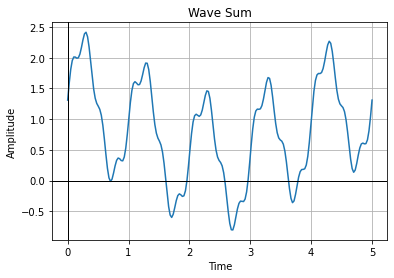

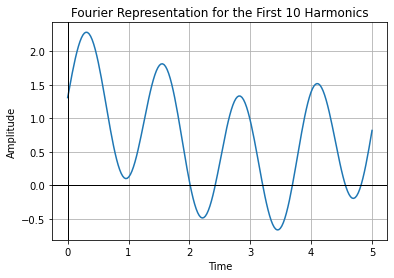

In [ ]:
# Comparing Fourier Representation with Original Function:
print("Wave Sum:", "\n", wave_sum, "\n")
print("Fourier Representation for the First 10 Harmonics:", "\n", fourier, "\n")

# SymPy Expression to Lambda Function:
f_fourier = sp.lambdify(t, fourier)
f_wave_sum = sp.lambdify(t, wave_sum)


#  Define Time Variable 
time = np.linspace(0, period, 200)

# Plotting:
plt.title("Wave Sum")
plot_func(time, f_wave_sum(time))

plt.title("Fourier Representation for the First 10 Harmonics")
plot_func(time, f_fourier(time))

#### Summary of Equations


The Fourier Series is given by:
$$ f(t)=a_{0} + \sum_{n=1}^N a_{n} sin(2\pi f_{n}t)\ + \sum_{n=1}^N b_{n} cos(2\pi f_{n}t)\ $$

The coefficients in the Fourier series are given by:

$$ a_{0} = \frac{1}{T} \int_{0}^{T} f(t)dt $$

$$ a_{n} = \frac{2}{T} \int_{0}^{T} f(t)sin(nwt) dt  $$

$$ b_{n} = \frac{2}{T} \int_{0}^{T} f(t)cos(nwt) dt  $$

## Coefficients Become the Spectrum 

Now that we have the coefficients, we can plot the spectrum of this signal. This is a one-sided discrete spectrum, a result of the Fourier series transformation.

We plot for each harmonic, its coefficient. Both sines and cosines of same frequency are plotted next to each other:

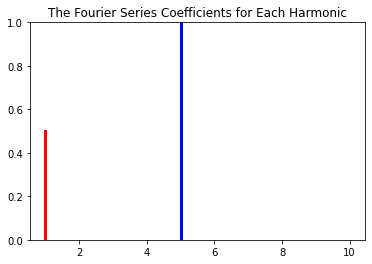

In [ ]:
# X-Axis (Harmonics):
x = np.arange(1, 11)

# Y-Axis (Coefficients):

for i in x:
  plt.axvline(x[i-1], ymin=0, ymax=a_n[i-1], linewidth=3, label="Sin", color="b")
  plt.axvline(x[i-1], ymin=0, ymax=b_n[i-1], linewidth=3, label="Cos", color="r")
  
plt.title("The Fourier Series Coefficients for Each Harmonic")
plt.show()

Due to the simplicity of the designed arbitrary signal used, the fourier represenation of the signal doesn't consist of much coefficients. In much complicated signals, each harmonic is usually represented with a combination of blue and red lines (i.e. sine and cosine coefficients).

You may say that this spectrum is in terms of sines and cosines, and this is not the way we see it in books. The spectrum ought to give just one number for each frequency.

- We can compute that one number by knowing that most signals are represented in complex notation.

- The total power shown on the y-axis of the spectrum is the power in both the sines and cosines. After all they are of the same frequency, just shifted in phase. So we should be able to add their powers. 

- This we can compute by doing the root sum square of the sine and cosine coefficients. Now we plot the modified spectrum using a combined coefficient. The new coefficient is:

$$  c_{n} = \sqrt{a_{n}^2 + b_{n}^2}$$

In [ ]:
# A Traditional Looking Spectrum Created from the Fourier Coefficients
c_n = []
for i in np.arange(1, 11):
  new_coeff = np.sqrt(a_n[i-1]**2 + b_n[i-1]**2)
  c_n.append(new_coeff)

print(c_n)

[0.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


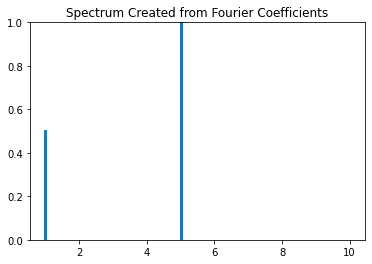

In [ ]:
# X-Axis (Harmonics):
x = np.arange(1, 11)

# Y-Axis (Coefficients):
for i in x:
  plt.axvline(x[i-1], ymin=0, ymax=c_n[i-1], linewidth=3, label="Sin")

plt.title("Spectrum Created from Fourier Coefficients")
plt.show()

The spectrum here looks exactly similar to the spectrum displayed in the "The Fourier Series Coefficients for Each Harmonic" plot due to the simple arbitrary signal we have used. 

Although this is not a real signal, we see that it now looks like a traditional spectrum. The y-axis can easily be converted to dB as is done for most spectrums.

In complex representation, the phase of the signal is defined by:

$$ \phi_{n} = \tan^{-1}(\frac{b_{n}}{a_{n}})$$

We could have plotted it too by just doing the above math for each harmonic. Phase plays a very important role in signal processing and particularly in complex representation. However, plotting phase is not nearly as visually instructive. Most of the time, when talking about spectrums, phase is entirely
ignored.

# Resources:
This notebook heavily rests on information derived from the following paper: [Fourier Analysis Made Easy](http://complextoreal.com/wp-content/uploads/2012/12/fft1.pdf). The purpose of this notebook is just to offer an interactive and visual representation of its contents.

Other sources were used as well, mainly for gaining insight and building general understanding, and are good start-points for learning Fourier Series and Transforms. A few are attached below:

**<ins>Videos:</ins>**
- **Explanations/Insights on Fourier Series and Transforms:**

  - [But what is the Fourier Transform? A visual introduction.](https://www.youtube.com/watch?v=spUNpyF58BY&t=11s)

  - [But what is a Fourier series? From heat flow to circle drawings | DE4](https://www.youtube.com/watch?v=r6sGWTCMz2k&list=PLide-NR5bCoFg5lFQbnOt5fvlrpnpdcrX&index=1&t=14s)

  - [The intuition behind Fourier and Laplace transforms I was never taught in school](https://www.youtube.com/watch?v=3gjJDuCAEQQ)

  - [Compute Fourier Series Representation of a Function](https://www.youtube.com/watch?v=SnzSpbQ2mcQ&t=128s)

  - [Pure Fourier series animation montage](https://www.youtube.com/watch?v=-qgreAUpPwM)


- **Applications in Physics:**
  - [The more general uncertainty principle, beyond quantum](https://www.youtube.com/watch?v=MBnnXbOM5S4)

  - [Solving the heat equation | DE3](https://www.youtube.com/watch?v=ToIXSwZ1pJU&t=14s)


**<ins>Papers:</ins>**
- [Fourier Analysis Made Easy Part I](http://complextoreal.com/wp-content/uploads/2012/12/fft1.pdf)

- [Fourier Analysis Made Easy Part II](http://www.mbfys.ru.nl/~robvdw/DGCN22/PRACTICUM_2011/MATLAB_FFT/fft2x.pdf)

 
**<ins>Webpages:</ins>**
- [An Interactive Introduction to Fourier Transforms](http://www.jezzamon.com/fourier/index.html)

- [A Tale of Math & Art: Creating the Fourier Series Harmonic Circles Visualization](https://alex.miller.im/posts/fourier-series-spinning-circles-visualization/)

- [An Interactive Guide To The Fourier Transform](https://betterexplained.com/articles/an-interactive-guide-to-the-fourier-transform/)

- [Theoretical Significance of Fourier Analysis](https://www.reddit.com/r/math/comments/6lt659/theoretical_significance_of_fourier_analysis/)